In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


import hashlib
%matplotlib inline

sns.set(style="dark")
plt.style.use("ggplot")

In [2]:
survey_data = pd.read_csv(r"Survey.csv")

In [3]:
survey_data = pd.read_csv(r"Survey.csv").iloc[:,5::]
pop_data = survey_data.where(survey_data['Music Preference #1'] == 'Pop')
rbsoul_data = survey_data.where(survey_data['Music Preference #1'] == 'R&B/Soul')
rap_data = survey_data.where(survey_data['Music Preference #1'] == 'Rap/Hip Hop')
country_data = survey_data.where(survey_data['Music Preference #1'] == 'Country')
rock_data = survey_data.where(survey_data['Music Preference #1'] == 'Rock')

In [4]:
pop_data.head(15)

,Music Preference #1,Music Preference #2,I enjoy going to a new restaurant,I enjoy hearing new ideas,I would go on a spontaneous road trip,I engage in theoretical or philosophical discussion,I like to daydream throughout the day,I think all genres of music are enjoyable,I am more comfortable doing things the way that I usually do them,I like experiencing new cultures,...,I easily get jealous of my friends,I am overwhelmed when something negative happens that affects me directly,Past experiences affect how I approach certain situations,I am a moody person,It takes a lot to get me angry,I feel comfortable with myself at all times,I worry about a lot of things and can be easily overwhelmed,I tend to think about what could go wrong instead of what possibilities could happen if it goes right,I often feel as though my day is ruined when something negative occurs,I am generally happy throughout the day
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pop,R&B,5.0,4.0,3.0,2.0,4.0,4.0,5.0,5.0,...,4.0,5.0,4.0,2.0,4.0,2.0,5.0,5.0,5.0,4.0
2,Pop,Rap/Hip Hop,4.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,...,2.0,2.0,3.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0
3,Pop,Rap/Hip Hop,5.0,5.0,5.0,1.0,3.0,2.0,4.0,4.0,...,4.0,3.0,4.0,3.0,3.0,2.0,3.0,4.0,3.0,4.0
4,Pop,Rap/Hip Hop,4.0,5.0,2.0,3.0,4.0,2.0,5.0,4.0,...,1.0,5.0,5.0,3.0,3.0,2.0,5.0,4.0,4.0,3.0
5,Pop,Rap/Hip Hop,4.0,4.0,1.0,4.0,1.0,4.0,4.0,4.0,...,5.0,4.0,5.0,4.0,3.0,2.0,4.0,4.0,3.0,3.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Pop,R&B,4.0,4.0,1.0,2.0,4.0,3.0,4.0,4.0,...,3.0,4.0,4.0,2.0,5.0,4.0,3.0,4.0,2.0,3.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pop_data = pop_data.iloc[:,2::].mean(0,skipna=True)
rbsoul_data = rbsoul_data.iloc[:,2::].mean(0,skipna=True)
rap_data = rap_data.iloc[:,2::].mean(0,skipna=True)
country_data = country_data.iloc[:,2::].mean(0,skipna=True)
rock_data = rock_data.iloc[:,2::].mean(0,skipna=True)

In [6]:
traits = ['Openness'] * 11 + ['Extroversion'] * 12 + \
['Agreeableness'] * 12 + ['Conscientiousness'] * 12 + ['Neuroticism'] * 14
values = [1,1,1,1,-1,1,-1,1,1,-1,1,1,1,-1,-1,-1,-1,1,-1,-1,1,-1,1,-1,1,1,-1,-1,\
          1,-1,1,-1,-1,-1,1,1,1,-1,1,-1,-1,1,-1,1,-1,-1,1,-1,1,1,-1,1,-1,-1,-1,1,-1,1,-1,1,-1]
pop_dict = {'Scores': pop_data, 'Trait': traits, 'Value': values}
rbsoul_dict = {'Scores': rbsoul_data, 'Trait': traits, 'Value': values}
rap_dict = {'Scores': rap_data, 'Trait': traits, 'Value': values}
country_dict = {'Scores': country_data, 'Trait': traits, 'Value': values}
rock_dict = {'Scores': rock_data, 'Trait': traits, 'Value': values}

pop_df = pd.DataFrame(pop_dict)
rbsoul_df = pd.DataFrame(rbsoul_dict)
rap_df = pd.DataFrame(rap_dict)
country_df = pd.DataFrame(country_dict)
rock_df = pd.DataFrame(rock_dict)
pop_df.sample(20).head(63)

,Scores,Trait,Value
I enjoy ice breakers with new people,3.050000,Extroversion,1
It’s important for me to be on time,3.950000,Conscientiousness,1
I am not good at consoling friends who need emotional support,2.473684,Agreeableness,-1
I worry about a lot of things and can be easily overwhelmed,4.000000,Neuroticism,1
I feel comfortable going out of my way to introduce myself to new people,3.350000,Extroversion,-1
I tend to hide/suppress my emotions rather then talk with someone about it,3.450000,Extroversion,-1
It takes a long time to get comfortable with a new friend,3.150000,Extroversion,-1
I keep thinking about a mistake I made in the past,4.000000,Neuroticism,1
I like experiencing new cultures,4.400000,Openness,1
I am more comfortable doing things the way that I usually do them,4.200000,Openness,-1


In [7]:
pop_df['Real Score'] = pop_df['Scores'] * pop_df['Value']
rbsoul_df['Real Score'] = rbsoul_df['Scores'] * rbsoul_df['Value']
rap_df['Real Score'] = rap_df['Scores'] * rap_df['Value']
country_df['Real Score'] = country_df['Scores'] * country_df['Value']
rock_df['Real Score'] = rock_df['Scores'] * rock_df['Value']

pop_df.sample(20).head(30)

,Scores,Trait,Value,Real Score
I tend to think about what could go wrong instead of what possibilities could happen if it goes right,3.70,Neuroticism,-1,-3.70
I am a moody person,3.10,Neuroticism,-1,-3.10
A bad moment will ruin my entire day,3.50,Neuroticism,1,3.50
It takes a lot to get me angry,3.95,Neuroticism,1,3.95
It’s important for me to be on time,3.95,Conscientiousness,1,3.95
I don’t really make time for other people.,2.45,Agreeableness,-1,-2.45
I prefer listening to other people talk about an issue rather than give my own insight,3.65,Extroversion,-1,-3.65
Past experiences affect how I approach certain situations,4.30,Neuroticism,-1,-4.30
I enjoy ice breakers with new people,3.05,Extroversion,1,3.05
I get frustrated when someone misplaces my things,4.05,Conscientiousness,-1,-4.05


In [8]:
pop_trait_data_mean = pop_df.groupby(['Trait']).mean()['Real Score']+1
pop_trait_data_mean.head()

Trait
Agreeableness        1.223026
Conscientiousness    0.987500
Extroversion         0.520833
Neuroticism          0.571429
Openness             2.786364
Name: Real Score, dtype: float64

In [9]:
pop_trait_data_std = pop_df.groupby(['Trait']).std()['Real Score']
pop_trait_data_std.head()

Trait
Agreeableness        3.270943
Conscientiousness    3.764857
Extroversion         3.297000
Neuroticism          3.730576
Openness             3.496648
Name: Real Score, dtype: float64

In [10]:
rbsoul_trait_data_mean = rbsoul_df.groupby(['Trait']).mean()['Real Score']+1
rbsoul_trait_data_mean.head()

Trait
Agreeableness        1.088542
Conscientiousness    1.223958
Extroversion         0.427083
Neuroticism          0.477679
Openness             2.926136
Name: Real Score, dtype: float64

In [11]:
rbsoul_trait_data_std = rbsoul_df.groupby(['Trait']).std()['Real Score']
rbsoul_trait_data_std.head()

Trait
Agreeableness        3.010453
Conscientiousness    3.757611
Extroversion         3.268178
Neuroticism          3.449464
Openness             3.356642
Name: Real Score, dtype: float64

In [12]:
rap_trait_data_mean = rap_df.groupby(['Trait']).mean()['Real Score']+1
rap_trait_data_mean.head()

Trait
Agreeableness        1.466667
Conscientiousness    1.083333
Extroversion         0.716667
Neuroticism          0.300000
Openness             3.000000
Name: Real Score, dtype: float64

In [13]:
rap_trait_data_std = rap_df.groupby(['Trait']).std()['Real Score']
rap_trait_data_std.head()

Trait
Agreeableness        3.179861
Conscientiousness    3.707936
Extroversion         3.342790
Neuroticism          3.083205
Openness             3.498571
Name: Real Score, dtype: float64

In [14]:
country_trait_data_mean = country_df.groupby(['Trait']).mean()['Real Score']+1
country_trait_data_mean.head()

Trait
Agreeableness        1.111111
Conscientiousness    0.805556
Extroversion         1.250000
Neuroticism          0.214286
Openness             2.939394
Name: Real Score, dtype: float64

In [15]:
country_trait_data_std = country_df.groupby(['Trait']).std()['Real Score']
country_trait_data_std.head()

Trait
Agreeableness        2.951915
Conscientiousness    3.580131
Extroversion         3.615693
Neuroticism          3.185456
Openness             3.309307
Name: Real Score, dtype: float64

In [16]:
rock_trait_data_mean = rock_df.groupby(['Trait']).mean()['Real Score']+1
rock_trait_data_mean.head()

Trait
Agreeableness        1.300000
Conscientiousness    1.350000
Extroversion         1.000000
Neuroticism          0.285714
Openness             3.072727
Name: Real Score, dtype: float64

In [17]:
rock_trait_data_std = rock_df.groupby(['Trait']).std()['Real Score']
rock_trait_data_std.head()

Trait
Agreeableness        3.397860
Conscientiousness    3.866053
Extroversion         3.295176
Neuroticism          3.486867
Openness             3.872232
Name: Real Score, dtype: float64

In [18]:
data = {'Pop': pop_trait_data_mean, 'R&B/Soul': rbsoul_trait_data_mean, 'Rap/Hip Hop': rap_trait_data_mean, \
        'Country': country_trait_data_mean, 'Rock': rock_trait_data_mean}
df = pd.concat(data, axis = 1)
df.head(20)

,Pop,R&B/Soul,Rap/Hip Hop,Country,Rock
Trait,,,,,
Agreeableness,1.223026,1.088542,1.466667,1.111111,1.300000
Conscientiousness,0.987500,1.223958,1.083333,0.805556,1.350000
Extroversion,0.520833,0.427083,0.716667,1.250000,1.000000
Neuroticism,0.571429,0.477679,0.300000,0.214286,0.285714
Openness,2.786364,2.926136,3.000000,2.939394,3.072727


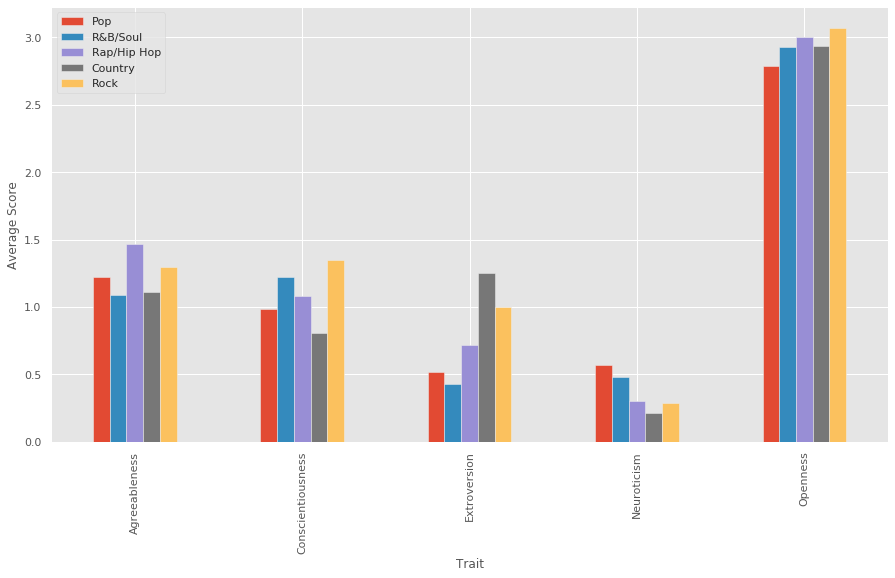

In [19]:
df.plot.bar(figsize=(15,8));
plt.ylabel('Average Score');
plt.show()

In [22]:
data_std = {'Pop': pop_trait_data_std, 'R&B/Soul': rbsoul_trait_data_std, 'Rap/Hip Hop': rap_trait_data_std, \
        'Country': country_trait_data_std, 'Rock': rock_trait_data_std}
df_std = pd.concat(data_std, axis = 1)
df_std.head(20)

,Pop,R&B/Soul,Rap/Hip Hop,Country,Rock
Trait,,,,,
Agreeableness,3.270943,3.010453,3.179861,2.951915,3.397860
Conscientiousness,3.764857,3.757611,3.707936,3.580131,3.866053
Extroversion,3.297000,3.268178,3.342790,3.615693,3.295176
Neuroticism,3.730576,3.449464,3.083205,3.185456,3.486867
Openness,3.496648,3.356642,3.498571,3.309307,3.872232


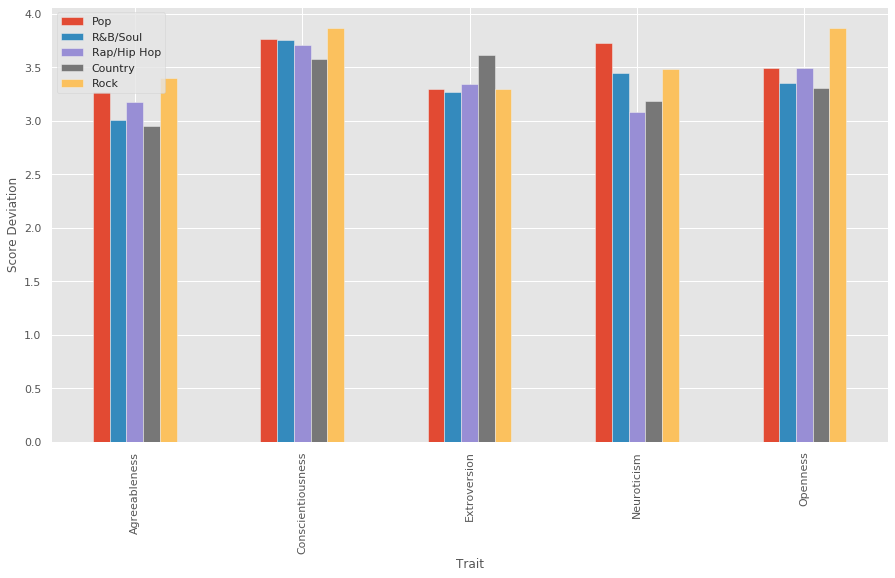

In [23]:
df_std.plot.bar(figsize=(15,8));
plt.ylabel('Score Deviation');
plt.show()